In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ygain = pd.read_excel("ygain1010.xlsx")
gain = pd.read_excel("gain1010.xlsx", header=None)
sn = pd.concat([ygain, gain], axis=1)

sn.columns = sn.iloc[1]
sn = sn[2:].reset_index(drop=True)
sn.rename(columns={sn.columns[0]: "target"}, inplace=True)
sn.head()

1,target,T01,H01,T02,H02,T11,H11,T12,H12,T21,H21,T22,H22
0,1.0,30.21,43.82,30.16,43.05,30.2,43.79,30.17,43.05,30.19,43.79,30.17,43.05
1,1.0,30.2,43.79,30.17,43.05,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12
2,1.0,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09
3,1.0,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09
4,1.0,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09


In [7]:
sn.dropna(inplace=True)
x = sn.drop("target", axis=1)
y = sn["target"]


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [11]:
# y_pred_prob = model.predict_proba(x_test)
y_pred = model.predict(x_test)
print(f"acc = {accuracy_score(y_test, y_pred)*100:.2f}%")

acc = 99.36%


conf matrix


<AxesSubplot: >

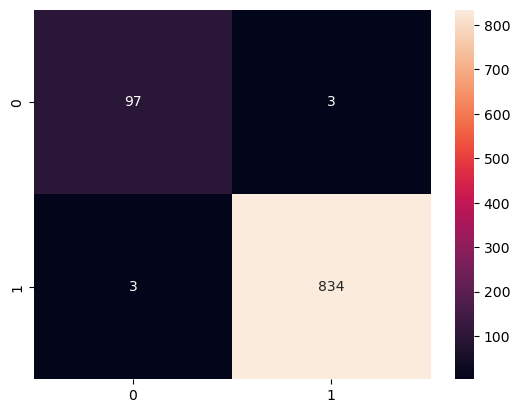

In [12]:
print("conf matrix")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")